In [ ]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Data

In [2]:
data = pd.read_csv("2019.csv")

### Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


We can see there are no nulls in each column.

In [ ]:
 data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


The following columns:
       'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'. 
describe the extent to which these factors contribute in evaluating the happiness in each country. They were asked from a scale of 0 to 10 how happy are their lives. 0 being the worst possible life and 10 being best possible life for them.


In [6]:
# Do we have missing values ?
data.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Great we don't have any missing values 

In [7]:
# Checking if we have any unique values 
data.nunique() # Returns number of unique values of each column

Overall rank                    156
Country or region               156
Score                           155
GDP per capita                  146
Social support                  145
Healthy life expectancy         119
Freedom to make life choices    130
Generosity                      118
Perceptions of corruption       113
dtype: int64

We can see there are no duplicates for Country/Region which is good the the rest that are non unique makes sense.

In [8]:
# Checking How the ranking works.
data.sort_values(by="Score", ascending=False).head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


So we can conclude the ranking is by the happiness score.

In [9]:
data.sort_values(by="Score").head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110


In [10]:
# Just checking the leading country in terms of Perceptions of corruption in East Africa
east_africa = ['Kenya', 'Tanzania', 'Uganda', 'Rwanda', 'Burundi', 'South Sudan', 'Ethiopia', 'Somalia', 'Eritrea']

data[data['Country or region'].isin(east_africa)].sort_values(by="Perceptions of corruption", ascending=False)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
111,112,Somalia,4.668,0.000,0.698,0.268,0.559,0.243,0.270
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
133,134,Ethiopia,4.286,0.336,1.033,0.532,0.344,0.209,0.100
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091
135,136,Uganda,4.189,0.332,1.069,0.443,0.356,0.252,0.060
120,121,Kenya,4.509,0.512,0.983,0.581,0.431,0.372,0.053


In [ ]:
# Checking the Correlation between the numeric data 
numeric_data = data.drop(['Country or region'], axis=1)

In [12]:
numeric_data.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


We can see that what contributes greatly to the score of happiness in the Country in order is:
- GDP per capital
- Healthy life expectancy 
- Social Support
- Freedom to make life choices 
- Perceptions of corruption 
- Generosity

### Data Visualization

#### Heatmap for Correlation

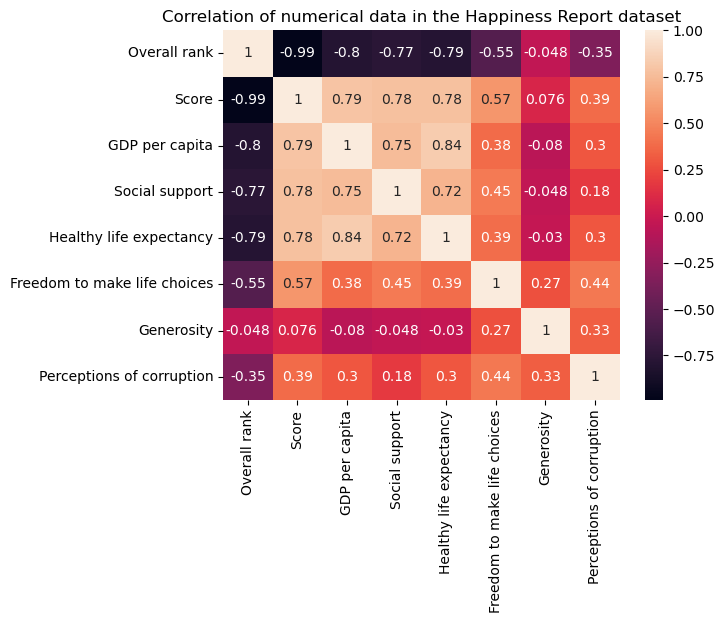

In [ ]:
# Heat map to show the correlation between each numeric column of the data set.
sns.heatmap(numeric_data.corr(), annot=True)
plt.title("Correlation of numerical data in the Happiness Report dataset")
plt.show()

In [ ]:
# Setting Country or region to be the index.
data_ind= data.set_index(["Country or region"])

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025


#### Bar Plots for comparison

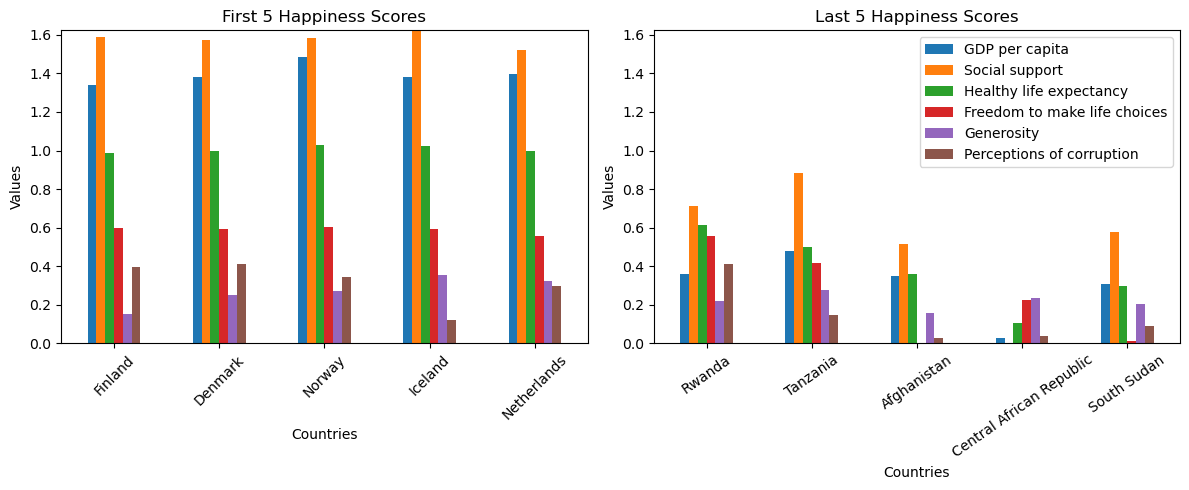

In [ ]:
# Subsetting the data
last_5 = data_ind.iloc[-5:, 2:] # least happy countries
first_5 = data_ind.iloc[:5, 2:] # most happy countries 

# side-by-side  plot of the two sets of countries
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot first 5 happy countries
first_5.plot(kind="bar", ax=axes[0], title="First 5 Happiness Scores", legend=False, rot=45)
axes[0].set_xlabel("Countries")
axes[0].set_ylabel("Values")

# Plot last 5 happy countries
last_5.plot(kind="bar", ax=axes[1], title="Last 5 Happiness Scores", legend= True, rot=35)
axes[1].set_xlabel("Countries")
axes[1].set_ylabel("Values")

# Making sure they have the same axis for easy comparison
y_min = min(first_5.min().min(), last_5.min().min())
y_max = max(first_5.max().max(), last_5.max().max())

# Apply same y-axis limits
axes[0].set_ylim(y_min, y_max)
axes[1].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()



Through this comparison we can clearly tell all factors highlighted contribute to the Happiness Score and therefore all are important.

#### Scatter plots to show Relation

In [26]:
data.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

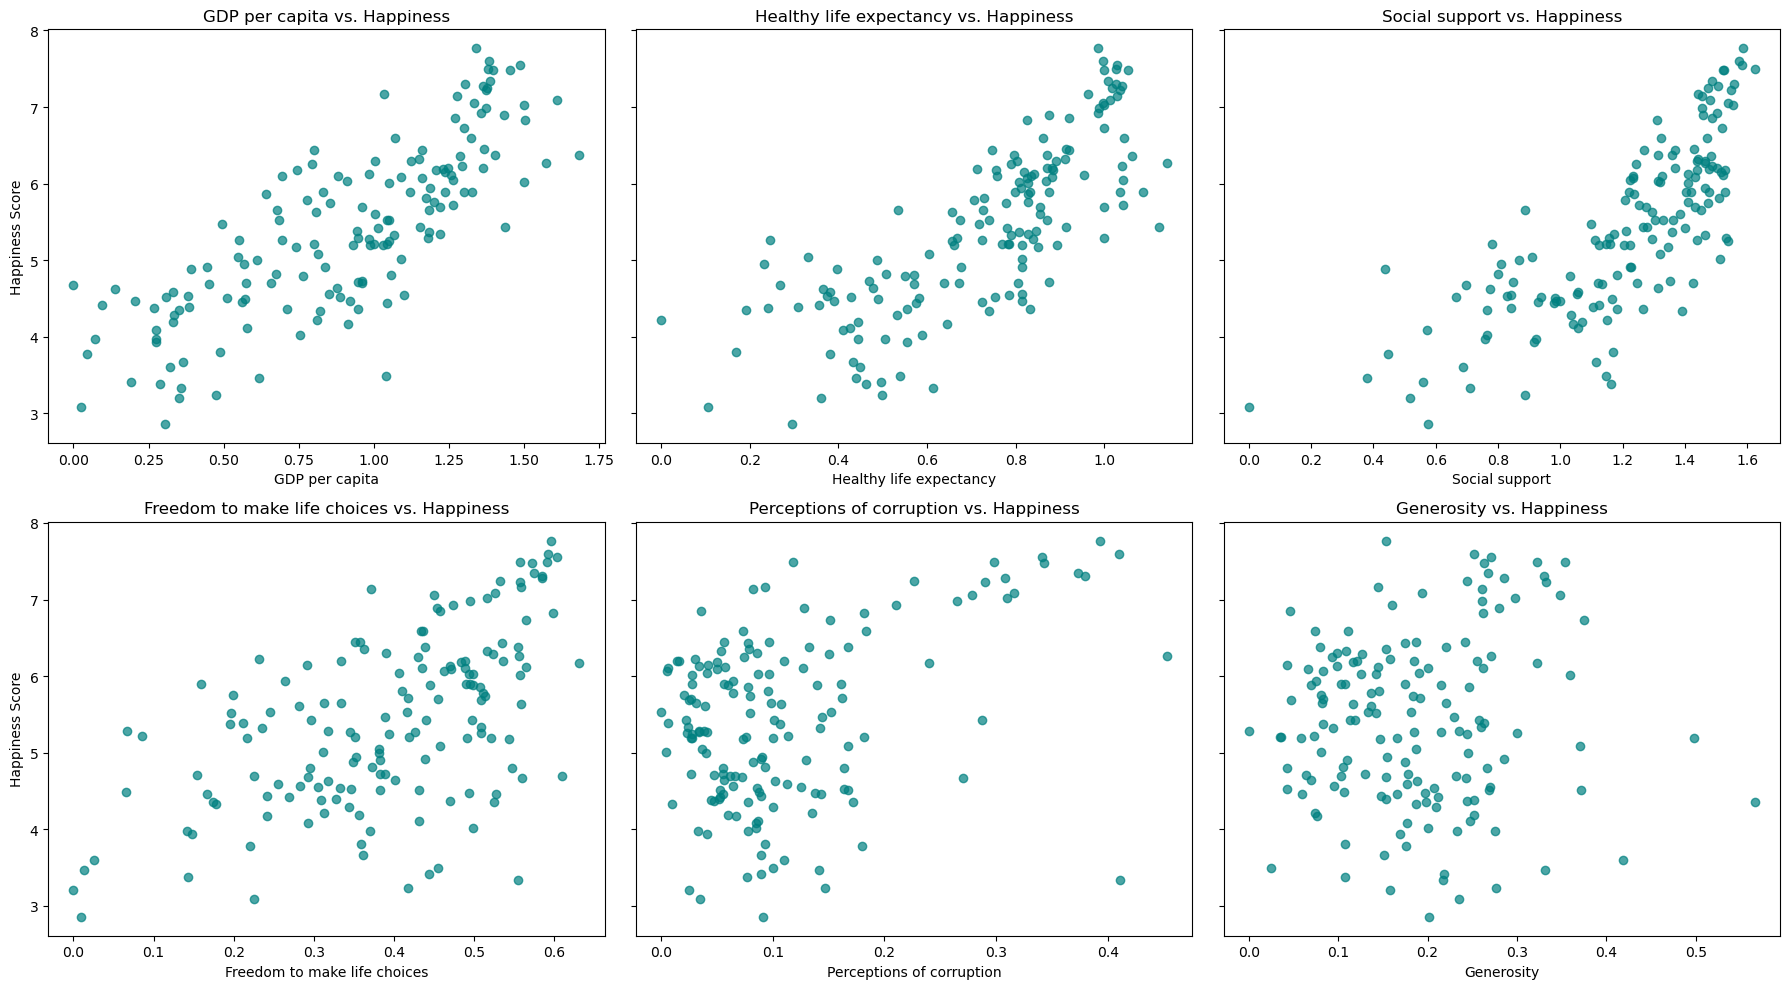

In [ ]:
# Plotting the various Factors affecting the Happiness Score with the Happiness Score.
happiness_score = data["Score"]
factors = ["GDP per capita", "Healthy life expectancy", "Social support", "Freedom to make life choices", 
           "Perceptions of corruption", "Generosity"]

# Arranging the plots in two rows with 3 plots each
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

# Flatten axes array for easier looping
axes = axes.flatten()

# Loop over each factor and create scatter plots
for i, factor in enumerate(factors):
    axes[i].scatter(data[factor], happiness_score, alpha=0.7, color='teal')
    axes[i].set_xlabel(factor)
    axes[i].set_title(f"{factor} vs. Happiness")
    if i % 3 == 0:  # First column of each row
        axes[i].set_ylabel("Happiness Score")

plt.tight_layout()
plt.show()

### Conclusion
Just like we saw in the heatmap, the scatter plots confirm it—countries with higher GDP per capita tend to be much happier. On the flip side, generosity doesn’t seem to move the happiness needle much, at least on a national scale.